# Breast Cancer

 Binary Classication for 

 - Logistic Regression: Use method from skicklearn directly
 - Step2: Implement epochs and report best mse / accuracy and r2 
 - Step3: 
 - **Loss Function**



Add Sensitivity / Recall
HyperParameter Tuning?




## Logistic Regression 

### Data Prep

dataset size:569
The accuracy for this fold is: 0.9310344827586207
The accuracy for this fold is: 0.9655172413793104
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9310344827586207
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9655172413793104
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.896551724137931
The accuracy for this fold is: 0.9285714285714286
The accuracy for this fold is: 0.8928571428571429
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9285714285714286
The accuracy for this fold is: 0.9285714285714286
The accuracy for this fold is: 0.9285714285714286
The accuracy for this fold is: 1.0
The accuracy for this fold is: 0.9285714285714286
Accuracy Score Mean: 0.9612684729064037
Accuracy on the entire dataset: 0.37258347978910367
              precision    

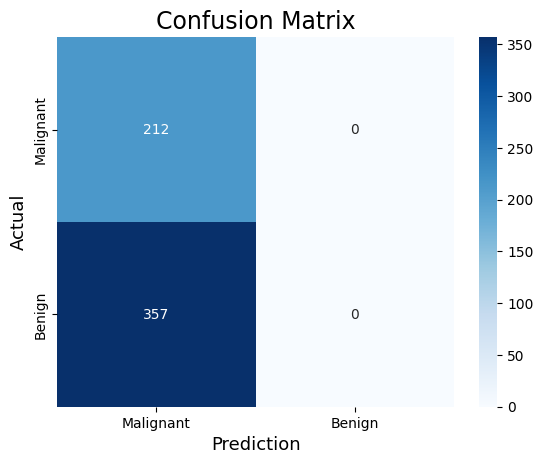

In [34]:
# Referemce to HW_1 Code  
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

 

def logisticRegression(X, y, epochs, folds,random_state=None):
    models = []
    accuracy_scores = []
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        smote = SMOTE(random_state=random_state)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

        model = SGDClassifier(loss="log_loss", max_iter=epochs, class_weight='balanced')
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
        
        # # Use method directly 
        # model = LogisticRegression()
        # model.fit(X_train_scaled, y_train)
        # y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"The accuracy for this fold is: {accuracy}")
        # Sensitivity // 
        
        accuracy_scores.append(accuracy) 
        models.append(model) 

    max_accuracy_index = np.argmax(accuracy_scores)
    best_model = models[max_accuracy_index]
    average_accuracy = np.mean(accuracy_scores)

    # print(f"Best model's weights are: {best_model.coef_} because it has the best accuracy of {max(accuracy_scores)} \n")
    print(f"Accuracy Score Mean: {average_accuracy}")
    
    return average_accuracy, best_model 


breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print("dataset size:{}".format(X.shape[0]))

average_acc,best_model = logisticRegression(X, y, epochs=100, folds=20,random_state=42); 

# X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred = best_model.predict(X)

final_accuracy = accuracy_score(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)
print(f"Accuracy on the entire dataset: {final_accuracy}")

cm = confusion_matrix(y, y_pred)
print(class_report)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cmap='Blues')
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

Result shows that model is bad at handeling class 1, indicating there are class imbalance during the training process

# Random Forest

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9649
Confusion Matrix:
[[40  3]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

